# Investigation of differences in perveiced intensity at low and high odor concentrations
### Author: Max Verbiest

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context("poster")

## Loading dataset, preprocessing and splitting into concentrations

The TrainSet.txt table is loaded, replicate rows are dropped and 'Replicate' column is also removed

In [4]:
df = pd.read_csv("../data/TrainSet.txt", header=0, sep="\t")
df.head()

,Compound Identifier,Odor,Replicate,Intensity,Dilution,subject #,INTENSITY/STRENGTH,VALENCE/PLEASANTNESS,BAKERY,SWEET,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
0,126,4-Hydroxybenzaldehyde,NaN,low,"1/1,000",1,7,62.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126,4-Hydroxybenzaldehyde,NaN,high,01.Oct,1,37,60.0,0.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,126,4-Hydroxybenzaldehyde,NaN,low,"1/1,000",2,55,89.0,0.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,126,4-Hydroxybenzaldehyde,NaN,high,01.Oct,2,64,71.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,126,4-Hydroxybenzaldehyde,NaN,low,"1/1,000",3,89,68.0,0.0,62.0,...,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df = df[df.Replicate.isna()].drop("Replicate", axis=1)

In [8]:
# We have 0 'NA' values in the "INTENSITY/STRENGTH" column, so no need for filtering
df["INTENSITY/STRENGTH"].isna().sum()

0

I'm focusing on the 'INTENSITY/STRENGTH' column, I therefore drop the other descriptors. The data set is split into low and high concentration subsets. I also make a DF where each cell contains the difference between the low and high intensity scores that a subject assigned to a compound. (low - high, so if the diff < 0, the intensity is lower in the low concentration observation).

In [9]:
target_col = "INTENSITY/STRENGTH"

df_low = df[df["Intensity"] == "low "].loc[:,["subject #", "Compound Identifier", target_col]]
df_high = df[df["Intensity"] == "high "].loc[:,["subject #", "Compound Identifier", target_col]]



df_diff = df_low.copy(deep=True)
df_diff[target_col] = df_diff[target_col] - np.array(df_high[target_col])

I'm also creating a combined dataframe with both concentrations (in a very roundabout way...)

In [10]:
starting_cols = df_high.columns
df_high["Concentration"] = "high"
df_low["Concentration"] = "low"
df_comb = pd.concat([df_high, df_low])

df_high = df_high.loc[:,starting_cols]
df_low = df_low.loc[:,starting_cols]

Pivoting data frames so that every column is a compound, and every row is a subject. Result is 49x338 data frames.

In [11]:
df_high_wide = df_high.pivot(index="subject #", columns="Compound Identifier", values=target_col)
df_low_wide = df_low.pivot(index="subject #", columns="Compound Identifier", values=target_col)
df_diff_wide = df_diff.pivot(index="subject #", columns="Compound Identifier", values=target_col)

print(df_diff_wide.shape)
df_diff_wide.head(n=10)

(49, 338)


Compound Identifier,126,176,177,196,239,240,241,244,261,263,...,5363388,5363491,5364729,5365027,5365049,5366244,5367706,5368076,6429333,6999977
subject #,,,,,,,,,,,,,,,,,,,,,
1,-30,0,3,-41,21,-73,79,-5,-11,-15,...,-53,-47,-20,11,-59,0,52,-60,0,5
2,-9,-83,-23,0,0,-30,0,-9,-25,-54,...,-43,0,2,-20,-84,0,0,-72,0,-59
3,89,-69,-83,-40,-64,-51,64,-54,-33,11,...,-66,0,-60,0,-17,-62,-2,0,71,0
4,-71,20,-90,-91,-69,-4,0,-5,-93,-56,...,-12,21,0,0,-65,-13,-69,-10,-1,-100
5,-58,-67,-60,0,0,-84,-18,7,-7,0,...,-68,0,-50,-63,-68,-54,0,-69,0,0
6,0,0,0,0,0,-88,0,0,-17,0,...,-53,0,4,0,0,-57,9,0,0,13
7,-12,0,-17,-21,-22,-85,-2,-28,-11,3,...,-3,14,-10,-2,-94,-90,-79,-31,-66,-5
8,-5,-57,-33,-45,-4,-57,19,-79,-56,0,...,-40,0,17,-82,-50,-66,-54,-50,0,-32
9,-100,-17,-100,0,-31,-100,0,-47,-100,-25,...,-100,0,-61,-62,-30,-43,0,0,0,-54


Same for the combined DF, but here the resulting table is 49x676

In [12]:
df_comb["Compound Identifier"] = df_comb.apply(lambda row: f"{row['Compound Identifier']}_{row['Concentration']}", axis=1)
df_comb_wide = df_comb.pivot(index="subject #", columns="Compound Identifier", values=target_col)


In [13]:
print(df_comb_wide.shape)
df_comb_wide.head()

(49, 676)


Compound Identifier,1001_high,1001_low,101010_high,101010_low,101604_high,101604_low,10285_high,10285_low,1032_high,1032_low,...,9589_high,9589_low,9609_high,9609_low,98330_high,98330_low,9862_high,9862_low,994_high,994_low
subject #,,,,,,,,,,,,,,,,,,,,,
1,76,60,72,0,11,46,4,2,0,0,...,100,0,6,0,100,92,75,1,76,42
2,93,0,58,0,79,39,0,0,0,0,...,78,0,91,0,98,86,76,11,66,0
3,3,0,11,0,81,0,0,76,71,0,...,16,0,17,0,100,91,18,14,63,0
4,98,0,100,0,86,80,85,1,100,75,...,100,8,100,24,100,100,100,7,76,6
5,10,0,73,0,72,0,0,0,0,0,...,33,0,12,0,87,85,77,0,80,0


## Can we cluster subjects based on their ability to perceive odors at low and high concentrations?

I will here be using a UMAP dimensions reduction, followed by HDBSCAN clustering of the different 'INTENSITY/STRENGTH' datasets.

In [14]:
from sklearn.preprocessing import StandardScaler

import umap
import hdbscan

Scale data...

In [15]:
df_low_wide_scaled = pd.DataFrame(StandardScaler().fit_transform(df_low_wide), columns=df_diff_wide.columns, index=df_low_wide.index)
df_high_wide_scaled = pd.DataFrame(StandardScaler().fit_transform(df_high_wide), columns=df_diff_wide.columns, index=df_high_wide.index)
df_diff_wide_scaled = pd.DataFrame(StandardScaler().fit_transform(df_diff_wide), columns=df_diff_wide.columns, index=df_diff_wide.index)
df_comb_wide_scaled = pd.DataFrame(StandardScaler().fit_transform(df_comb_wide), columns=df_comb_wide.columns, index=df_comb_wide.index)

print(df_comb_wide_scaled.shape)
df_comb_wide_scaled.describe()

(49, 676)


Compound Identifier,1001_high,1001_low,101010_high,101010_low,101604_high,101604_low,10285_high,10285_low,1032_high,1032_low,...,9589_high,9589_low,9609_high,9609_low,98330_high,98330_low,9862_high,9862_low,994_high,994_low
count,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,...,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01,4.900000e+01
mean,-7.930164e-17,-3.738506e-17,-1.110223e-16,2.605625e-17,9.204655e-17,-3.398642e-17,-4.531523e-18,4.531523e-17,1.472745e-17,6.797284e-18,...,2.356392e-16,-3.738506e-17,-4.078370e-17,2.492337e-17,4.520194e-16,-4.248302e-17,2.560310e-16,1.132881e-17,-1.993870e-16,6.570708e-17
std,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,...,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00,1.010363e+00
min,-1.890023e+00,-5.951187e-01,-2.139243e+00,-4.381614e-01,-1.665720e+00,-1.117568e+00,-8.098723e-01,-4.740713e-01,-6.657078e-01,-3.356018e-01,...,-2.932661e+00,-4.922126e-01,-1.509681e+00,-4.384291e-01,-3.364434e+00,-4.154633e+00,-2.925479e+00,-6.656094e-01,-2.586372e+00,-8.313091e-01
25%,-7.150607e-01,-5.951187e-01,-3.534460e-01,-4.381614e-01,-1.244830e+00,-1.083890e+00,-8.098723e-01,-4.740713e-01,-6.657078e-01,-3.356018e-01,...,-5.339528e-01,-4.922126e-01,-1.036022e+00,-4.384291e-01,-1.561339e-01,-2.498879e-01,-2.887042e-01,-6.656094e-01,-4.938254e-01,-8.313091e-01
50%,3.996470e-01,-5.951187e-01,2.867451e-01,-4.381614e-01,3.416015e-01,-6.185799e-03,-6.784692e-01,-4.740713e-01,-6.657078e-01,-3.356018e-01,...,8.793450e-02,-4.922126e-01,2.177807e-01,-4.384291e-01,3.374507e-01,3.767995e-01,2.135386e-01,-4.496169e-01,2.671005e-01,-5.619924e-01
75%,7.913010e-01,3.553079e-01,5.899936e-01,-2.972211e-01,7.624914e-01,8.020920e-01,8.983683e-01,-1.865776e-01,4.171032e-01,-3.356018e-01,...,8.875038e-01,-1.494997e-01,8.864757e-01,-2.929458e-01,7.693372e-01,6.660399e-01,7.157814e-01,-1.763204e-02,7.236561e-01,9.529138e-01
max,1.122701e+00,3.336191e+00,1.230185e+00,3.743068e+00,1.571895e+00,1.846117e+00,2.475206e+00,3.895834e+00,2.718076e+00,5.219968e+00,...,1.065186e+00,3.706020e+00,1.276548e+00,3.780585e+00,7.693372e-01,6.660399e-01,1.259878e+00,2.919865e+00,1.218258e+00,1.861858e+00


Create UMAP embeddings. For every dataset, two embeddings are made: a 10 dimensional one to perform the clustering in, and a 2 dimensional one to use for subsequent plotting. I played around with the number of dimensions for clustering a bit, but 10 dimensions seemed enough to capture whatever structure there was in the 'INTENSITY/STRENGTH' data.

In [16]:
reducer_high = umap.UMAP(random_state=42, n_components=10, min_dist=0)
reducer_high_plot = umap.UMAP(random_state=42, n_components=2)
embedding_high = reducer_high.fit_transform(df_high_wide_scaled)
embedding_high_plot = reducer_high_plot.fit_transform(df_high_wide_scaled)

reducer_low = umap.UMAP(random_state=42, n_components=10, min_dist=0)
reducer_low_plot = umap.UMAP(random_state=42, n_components=2)
embedding_low = reducer_low.fit_transform(df_low_wide_scaled)
embedding_low_plot = reducer_low_plot.fit_transform(df_low_wide_scaled)

reducer_diff = umap.UMAP(random_state=42, n_components=10, min_dist=0)
reducer_diff_plot = umap.UMAP(random_state=42, n_components=2)
embedding_diff = reducer_diff.fit_transform(df_diff_wide_scaled)
embedding_diff_plot = reducer_diff_plot.fit_transform(df_diff_wide_scaled)

reducer_comb = umap.UMAP(random_state=42, n_components=10, min_dist=0)
reducer_comb_plot = umap.UMAP(random_state=42, n_components=2)
embedding_comb = reducer_comb.fit_transform(df_comb_wide_scaled)
embedding_comb_plot = reducer_comb_plot.fit_transform(df_comb_wide_scaled)

Perform HDBSCAN clustering on 10-dimensional UMAP embeddings of 'INTENSITY/STRENGTH' datasets. The HDBSCAN parameters min_cluster_size and min_samples were selected by looking at how many subjects were assigned to a cluster, and also by comparing the results of different clustering parameters in scatter plots (see later cells in the notebook).

In [17]:
hdbscan.HDBSCAN()

clustering_high = hdbscan.HDBSCAN(min_cluster_size=20, min_samples=6).fit_predict(embedding_high)
clustering_low = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5).fit_predict(embedding_low)
clustering_diff = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=3).fit_predict(embedding_diff)
clustering_comb = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=3).fit_predict(embedding_comb)

def cluster_distributions(labels: np.array, level: str) -> None:
    counts = np.unique(labels, return_counts=True)
    print(f"Distribution across HDBSCAN clusters for '{level}' data")
    print(list(zip(counts[0], (counts[1] / np.sum(counts[1]) * 100))))
    
cluster_distributions(clustering_high, level="high")
cluster_distributions(clustering_low, level="low")
cluster_distributions(clustering_diff, level="diff")
cluster_distributions(clustering_comb, level="comb")


Distribution across HDBSCAN clusters for 'high' data
[(-1, 4.081632653061225), (0, 46.93877551020408), (1, 48.97959183673469)]
Distribution across HDBSCAN clusters for 'low' data
[(-1, 16.3265306122449), (0, 38.775510204081634), (1, 44.89795918367347)]
Distribution across HDBSCAN clusters for 'diff' data
[(-1, 22.448979591836736), (0, 34.69387755102041), (1, 20.408163265306122), (2, 22.448979591836736)]
Distribution across HDBSCAN clusters for 'comb' data
[(-1, 28.57142857142857), (0, 30.612244897959183), (1, 20.408163265306122), (2, 20.408163265306122)]


The cell below shows scatter plots of the 2-dimensional UMAP embeddings for the different 'INTENSITY/STRENGTH' datasets. There seems to be some structure in the 'high' and 'low' concentration datasets, but not so much for the 'diff' and 'comb' ones.

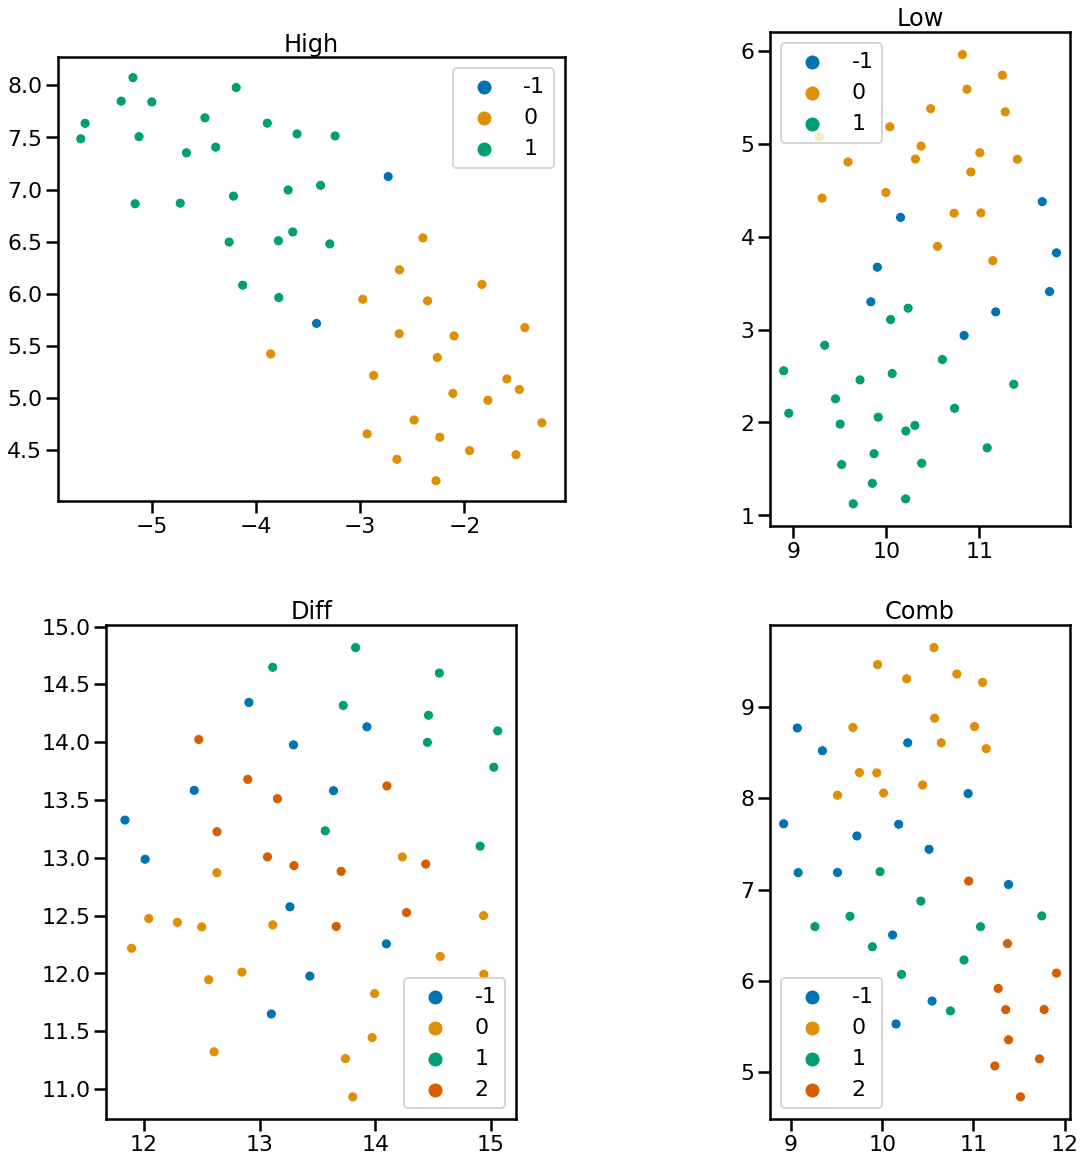

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(20, 20))

sns.scatterplot(x=embedding_high_plot[:, 0], y=embedding_high_plot[:, 1], hue=clustering_high, palette="colorblind", s=100, ax=ax1[0])
ax1[0].set_title("High")
ax1[0].set_aspect('equal')

sns.scatterplot(x=embedding_low_plot[:, 0], y=embedding_low_plot[:, 1], hue=clustering_low, palette="colorblind", s=100, ax=ax1[1])
ax1[1].set_title("Low")
ax1[1].set_aspect('equal')

sns.scatterplot(x=embedding_diff_plot[:, 0], y=embedding_diff_plot[:, 1], hue=clustering_diff, palette="colorblind", s=100, ax=ax2[0])
ax2[0].set_title("Diff")
ax2[0].set_aspect('equal')

sns.scatterplot(x=embedding_comb_plot[:, 0], y=embedding_comb_plot[:, 1], hue=clustering_comb, palette="colorblind", s=100, ax=ax2[1])
ax2[1].set_title("Comb")
ax2[1].set_aspect('equal')

plt.show()

Comparing the labels obtained from clustering the 'high' and 'low' dataset. In cases where a subject was assigned to a cluster in both the high and low approach, 87% were assigned to the same cluster label in both.

In [19]:
# (clustering_high == clustering_low).sum() / len(clustering_high) # also includes subjects not assigned to a cluster

total, matches = 0, 0
for i, label in enumerate(clustering_high):
    other_label = clustering_low[i]
    if label == -1 or other_label == -1:
        continue
    if label == other_label:
        matches += 1
    total += 1 

print(matches, total)
matches / total

34 39


0.8717948717948718

### Do all subjects use the same range of 'INTENSITY/STRENGTH' values? Do we see subgroups based on the cluster labels?

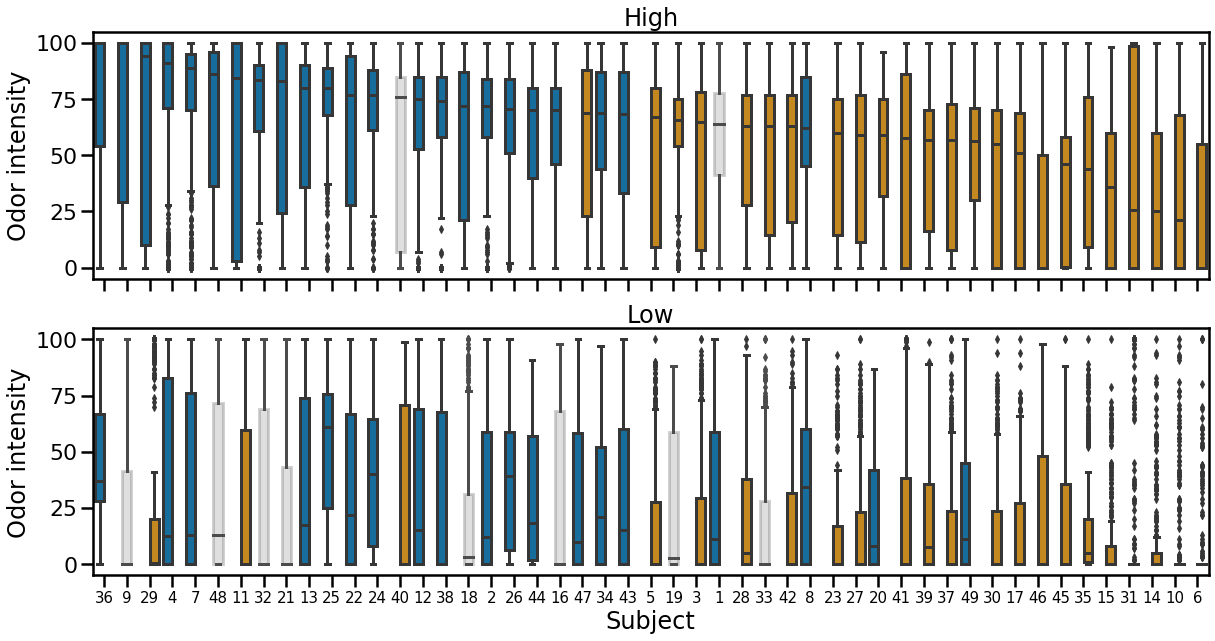

In [80]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10), sharex=True, sharey=True)

subject_order = df_high.groupby("subject #").median().sort_values(by=target_col, ascending=False).index

subject_cluster_mapping_high = pd.DataFrame({"label": clustering_high, "clustered": clustering_high >= 0}, index=df_high_wide.index)
subject_cluster_mapping_diff = pd.DataFrame({"label": clustering_diff, "clustered": clustering_diff >= 0}, index=df_diff_wide.index)
subject_cluster_mapping_low = pd.DataFrame({"label": clustering_low, "clustered": clustering_low >= 0}, index=df_low_wide.index)

df_plot_high = pd.merge(df_high, subject_cluster_mapping_high, on='subject #',how='left')

sns.boxplot(
    data=df_plot_high[~df_plot_high["clustered"]],
    order=subject_order,
    x = 'subject #', 
    y = target_col,
    ax=ax1,
    color=(0.5, 0.5, 0.5),
    boxprops=dict(alpha=.25),
    width=.4
)

sns.boxplot(
    data=df_plot_high[df_plot_high["clustered"]],
    order=subject_order,
    x = 'subject #', 
    y = target_col,
    ax=ax1,
    hue="label",
    palette="colorblind"
)
ax1.set_title("High", fontsize=24)
ax1.set_xlabel("")
ax1.legend_.remove()

df_plot_low = pd.merge(df_low, subject_cluster_mapping_low, on='subject #',how='left')

sns.boxplot(
    data=df_plot_low[~df_plot_low["clustered"]],
    order=subject_order,
    x = 'subject #', 
    y = target_col,
    ax=ax2,
    color=(0.5, 0.5, 0.5),
    boxprops=dict(alpha=.25),
    width=.4
)
ax1.set(title="High", ylabel="Odor intensity")

sns.boxplot(
    data=df_plot_low[df_plot_low["clustered"]],
    order=subject_order,
    x = 'subject #', 
    y = target_col,
    ax=ax2,
    hue="label",
    palette="colorblind"
)
ax2.set(title="Low", xlabel="Subject", ylabel="Odor intensity")
ax2.set_xticklabels(labels=subject_order, fontsize=15)
ax2.legend_.remove()


plt.show()

**Conclusion:** Most people use a similar range of 'INTENSITY/STRENGTH' scores. There are, however, also people who tend to use high scores (left side of the graph above) or very low scores (right side of the graph above). The cluster labels obtained from HDBSCAN seem to be related to this observation: the '0' label group is mostly on the left, and use higher 'INTENSITY/STRENGTH' scores, whereas the other cluster is more on the right and uses lower 'INTENSITY/STRENGTH' scores in general. This effect is apparently still present in the data even after scaling. 

# Placeholder

In [9]:
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

df_t_test = {"Compound Identifier": [], "pval": []}
for name, group in df_high.groupby("Compound Identifier"):
    df_t_test["Compound Identifier"].append(name)
    pval = ttest_rel(
        a=df_low[df_low["Compound Identifier"] == name][target_col],
        b=group[target_col],          
        alternative="less").pvalue
    df_t_test["pval"].append(pval)

fdr = multipletests(df_t_test["pval"], is_sorted=False, method="fdr_bh", alpha=0.05)

df_t_test["reject"] = fdr[0]
df_t_test["pval_cor"] = fdr[1]
df_t_test = pd.DataFrame(df_t_test).set_index("Compound Identifier")
df_t_test.head(n=10)

,pval,reject,pval_cor
Compound Identifier,,,
126,8.800371e-05,True,1.239386e-04
176,3.411397e-02,True,3.843508e-02
177,7.552797e-06,True,1.171030e-05
196,1.446732e-04,True,1.963837e-04
239,6.720340e-02,False,7.447458e-02
240,1.305073e-21,True,5.513932e-20
241,7.916358e-01,False,8.132915e-01
244,9.577619e-09,True,2.088539e-08
261,1.067952e-09,True,2.714044e-09


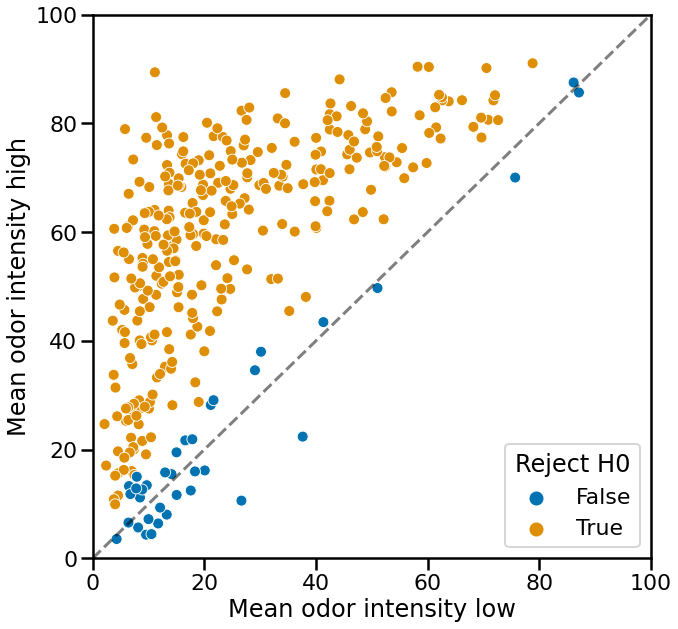

In [171]:
fig = plt.figure(figsize=(10, 10))

df_scatter = pd.DataFrame({"low": df_low_wide.mean(axis=0), "high": df_high_wide.mean(axis=0)}, index=df_low_wide.columns)
df_scatter = pd.merge(df_scatter, df_t_test, left_index=True, right_index=True)

ax = sns.lineplot(
    x=np.arange(0, 100, 0.01),
    y=np.arange(0, 100, 0.01),
    color="black",
    linestyle="dashed",
    alpha=0.5
)

sns.scatterplot(
    x=df_scatter["low"],
    y=df_scatter["high"],
    s=120,
    hue=df_scatter["reject"],
    palette="colorblind"
)
ax.set(xlabel="Mean odor intensity low", ylabel="Mean odor intensity high")
ax.legend(title="Reject H0")

plt.xlim(0, 100)
plt.ylim(0, 100)

plt.show()

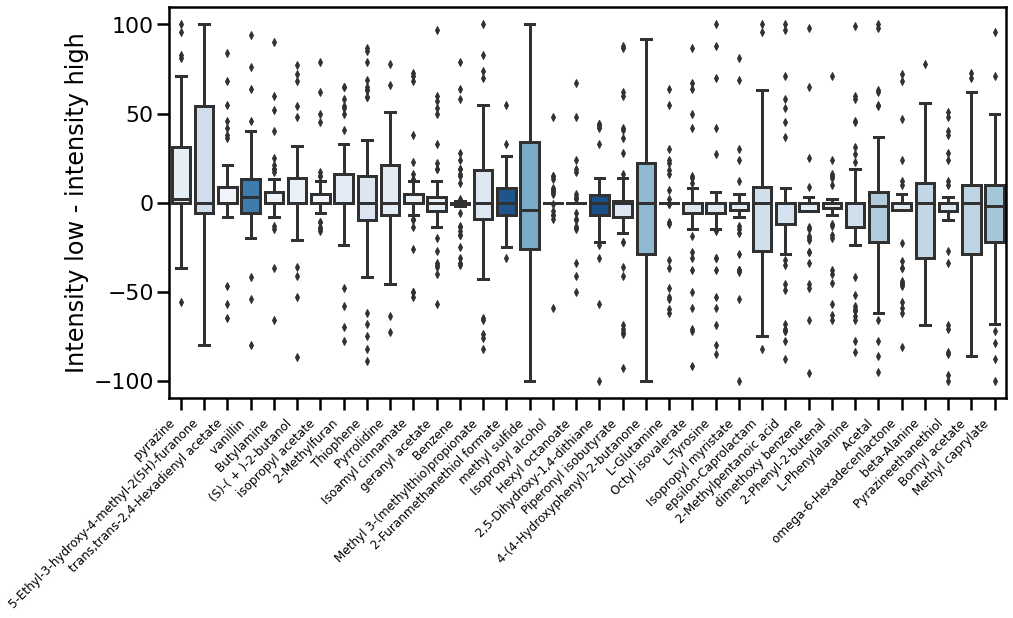

In [233]:
from matplotlib import cm
from matplotlib import colors

df_scatter["diff"] = df_scatter["low"] - df_scatter["high"]
df_insig = df_scatter[df_scatter['reject'] == False].sort_values(by='diff', ascending=False)
# df.sort_values()
df_odor_id_mapping = (df[["Compound Identifier", "Odor"]]
                      .drop_duplicates()
                      .set_index("Compound Identifier"))

df_insig = pd.merge(
    df_insig, 
    df_odor_id_mapping, 
    how="left", 
    left_index=True, 
    right_index=True
)

fig = plt.figure(figsize=(15, 8))

ax = sns.boxplot(
    data = df_diff_wide[df_insig.index],
    palette=cm.Blues(df_insig["high"]/100)
)
ax.set(xlabel="", ylabel="Intensity low - intensity high")
ax.set_xticklabels(df_insig["Odor"], fontsize=12)
fig.autofmt_xdate(rotation=45)

plt.show()


In [20]:
# 36 non-significant compounds
print(df_insig.shape)
df_insig

NameError: name 'df_insig' is not defined

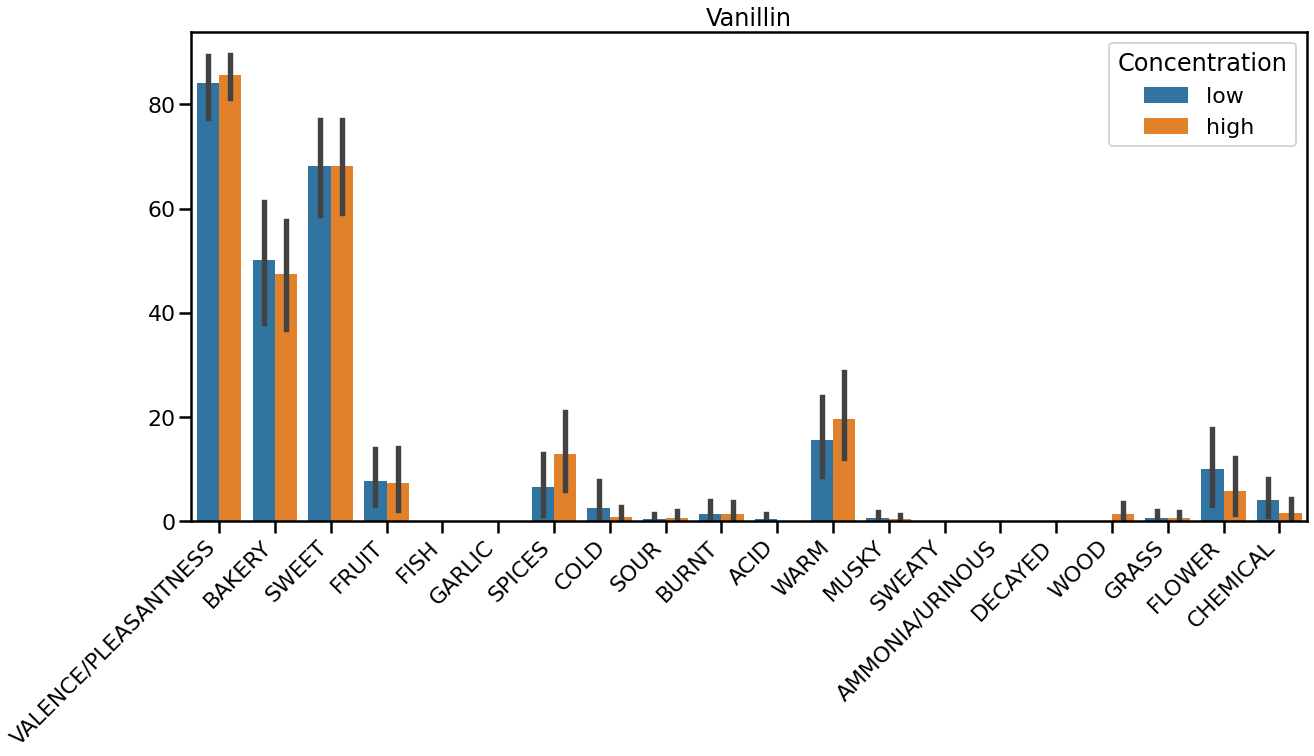

In [346]:
# 62144 1183 98330

fig = plt.figure(figsize = (20, 10))

a = df[df["Compound Identifier"] == 1183]
a = (pd.concat([a.loc[:,"Intensity"], a.loc[:,"VALENCE/PLEASANTNESS":"CHEMICAL"]], axis=1)
        .set_index("Intensity")
        .stack()
        .reset_index())
a.columns = ['Intensity', 'Descriptor', 'Value']

ax = sns.barplot(
    data = a,
    x="Descriptor",
    y="Value",
    hue="Intensity"
)
ax.set(title="Vanillin", xlabel="", ylabel="")
ax.legend(title="Concentration")

fig.autofmt_xdate(rotation=45)